In [2]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

In [10]:
df = pd.read_csv('/Users/songjunwoo/Documents/ai/Datasets/USA_Housing.csv')

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [16]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

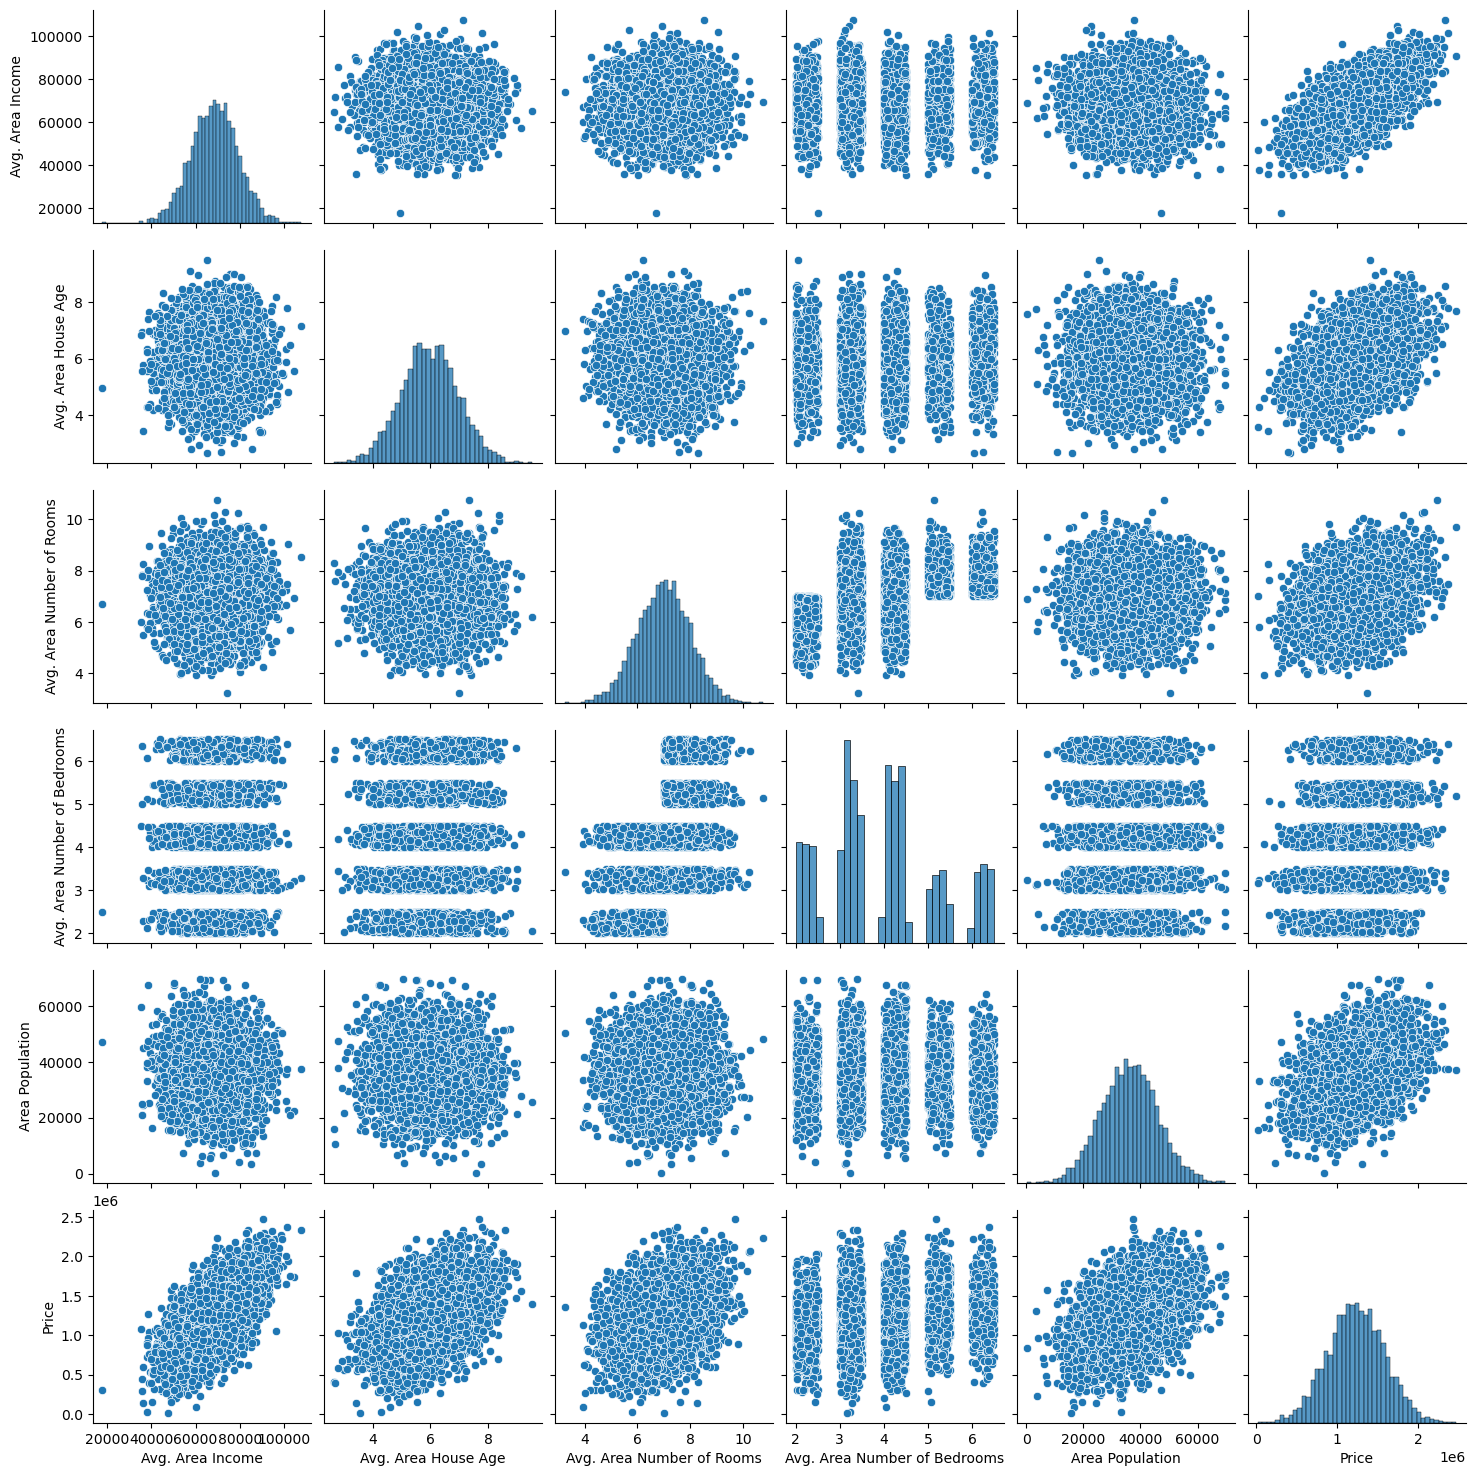

In [20]:
sns.pairplot(df)

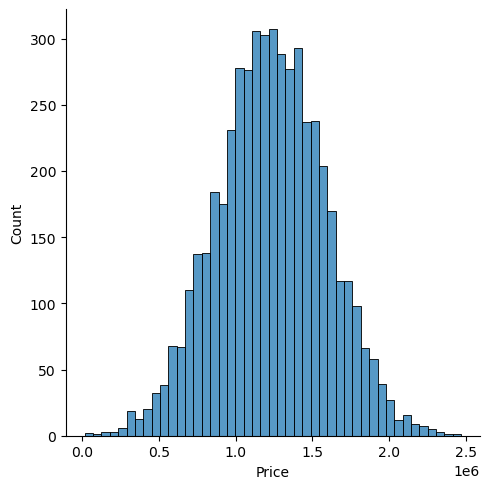

In [26]:
sns.displot(df['Price'])

<Axes: >

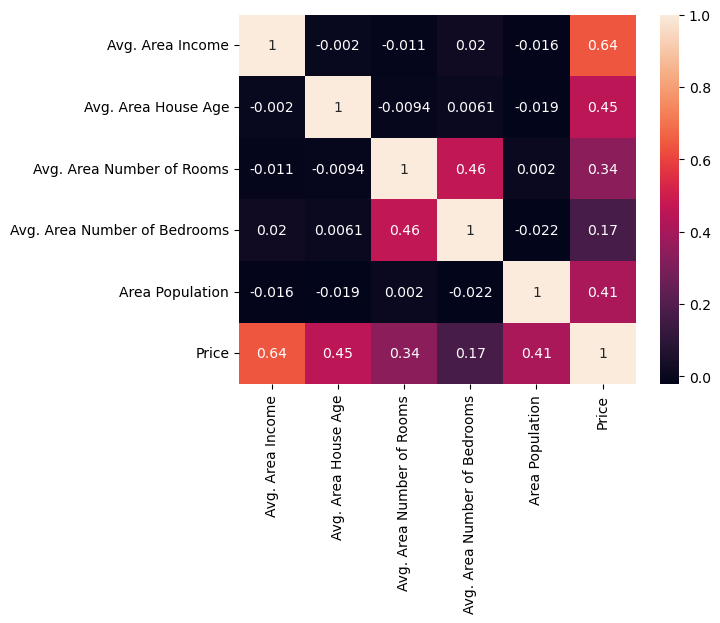

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [32]:
# 데이터셋 준비
# 주소는 일단 버림
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [34]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [36]:
y = df['Price']

In [38]:
X.shape

(5000, 5)

In [40]:
y.shape

(5000,)

In [44]:
# 훈련세트, 테스트세트 분리하기
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1234
)

In [48]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression()

In [52]:
reg.fit(X_train, y_train)

LinearRegression()

In [68]:
reg.intercept_ # 절편

-2646549.2062080614

In [70]:
reg.coef_ # 각 특성에 대한 기울기

array([2.16542943e+01, 1.63560682e+05, 1.22832000e+05, 1.95227146e+03,
       1.52247000e+01])

In [72]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [74]:
# 각 특성들의 기울기
cdf = pd.DataFrame(reg.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Area Income,21.654294
Avg. Area House Age,163560.682446
Avg. Area Number of Rooms,122831.999725
Avg. Area Number of Bedrooms,1952.271463
Area Population,15.224700


In [78]:
# Avg. Area Income: 다른 특성들이 고정되어있을때 이 특성이 1 증가하면 주택 가격은 21.654294씩 변함
# ...

In [80]:
predictions = reg.predict(X_test)

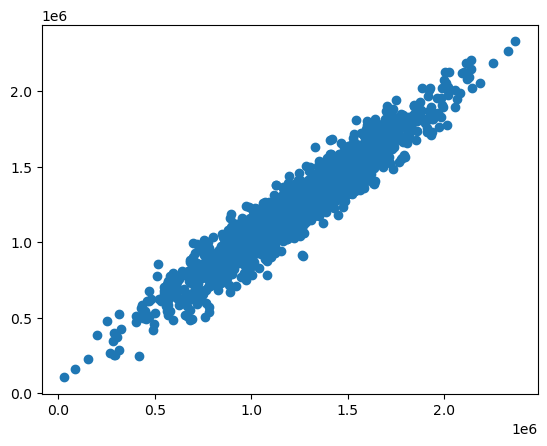

In [82]:
plt.scatter(y_test, predictions)

In [84]:
# 평가
# Mean Absolute Error(MAE): 오류값의 평균
# Mean Squared Error(MSE): 오류값을 제곱한 값들의 평균(MAE에 비해 오차값에 크게 민감함)
# Root Mean Squared Error(RMSE): 
from sklearn import metrics

In [86]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 82171.93658431627, MSE: 10603499972.372438, RMSE: 102973.29737544796
